In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
games = pd.read_csv('vgsales.csv')

In [59]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [60]:
games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [73]:
platforms = games['Platform'].unique()
print("Jenis Platform:", platforms)

Jenis Platform: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


In [74]:
Genre = games['Genre'].unique()
print("Jenis Genre:", Genre)

Jenis Genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [61]:
games.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [63]:
missing_values = games.isnull().sum()
games['Year'].fillna(games['Year'].mean(), inplace=True)
games.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [64]:
games = games.dropna()
games.drop_duplicates(inplace=True)

<ipython-input-64-61f088641621>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games.drop_duplicates(inplace=True)


In [65]:
missing_values_after_cleansing = games.isnull().sum()
duplicate_count_after_cleansing = games.duplicated().sum()
print("Missing Values setelah cleansing:\n", missing_values_after_cleansing)
print("Jumlah Duplikat setelah cleansing:", duplicate_count_after_cleansing)

Missing Values setelah cleansing:
 Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
Jumlah Duplikat setelah cleansing: 0


In [66]:
summary_stats = games.describe()
sales_by_genre = games.groupby('Genre')['Global_Sales'].sum()

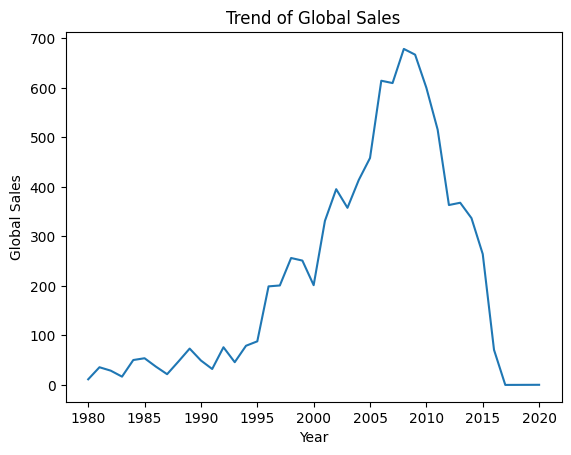

In [77]:
games['Year'] = games['Year'].astype(int)
sales_by_year = games.groupby('Year')['Global_Sales'].sum()  # Penjualan global per tahun

plt.plot(sales_by_year.index, sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Trend of Global Sales')
plt.show()

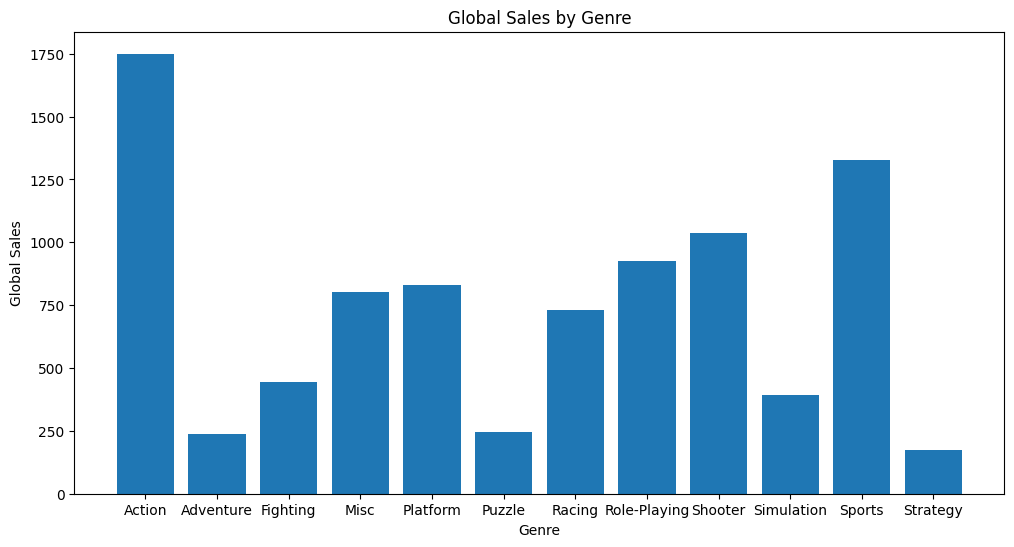

In [67]:
plt.figure(figsize=(12, 6))  # Mengatur lebar gambar menjadi 12 inci
plt.bar(sales_by_genre.index, sales_by_genre.values)
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.title('Global Sales by Genre')
plt.show()

In [79]:
# Menghitung jumlah kemunculan setiap genre
genre_counts = games['Genre'].value_counts()

# Membuat DataFrame baru dari genre_counts
genre_table = pd.DataFrame({'Genre': genre_counts.index, 'Count': genre_counts.values})

# Mengurutkan tabel genre berdasarkan huruf
genre_table = genre_table.sort_values(by='Genre')

# Menampilkan tabel genre dan jumlahnya
print(genre_table)

           Genre  Count
0         Action   3309
5      Adventure   1282
9       Fighting    846
2           Misc   1712
7       Platform    884
11        Puzzle    581
6         Racing   1248
3   Role-Playing   1486
4        Shooter   1308
8     Simulation    863
1         Sports   2343
10      Strategy    678


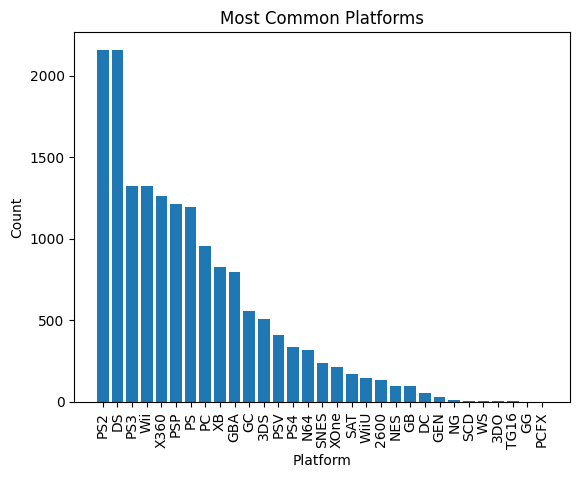

In [75]:
platform_counts = games['Platform'].value_counts()

# Menampilkan visualisasi bar chart platform terbanyak
plt.bar(platform_counts.index, platform_counts.values)
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Most Common Platforms')
plt.xticks(rotation=90)
plt.show()

In [76]:
platform_counts = games['Platform'].value_counts()

# Membuat DataFrame baru dari platform_counts
platform_table = pd.DataFrame({'Platform': platform_counts.index, 'Count': platform_counts.values})

# Menampilkan tabel platform dan jumlahnya
print(platform_table)

   Platform  Count
0       PS2   2159
1        DS   2156
2       PS3   1326
3       Wii   1324
4      X360   1261
5       PSP   1211
6        PS   1193
7        PC    954
8        XB    824
9       GBA    796
10       GC    556
11      3DS    507
12      PSV    411
13      PS4    336
14      N64    319
15     SNES    239
16     XOne    213
17      SAT    173
18     WiiU    143
19     2600    133
20      NES     98
21       GB     98
22       DC     52
23      GEN     27
24       NG     12
25      SCD      6
26       WS      6
27      3DO      3
28     TG16      2
29       GG      1
30     PCFX      1


In [69]:
platform_with_highest_sales = games.groupby('Platform')['Global_Sales'].sum().idxmax()  # Platform dengan penjualan tertinggi
genre_with_highest_sales = games.groupby('Genre')['Global_Sales'].sum().idxmax()  # Genre dengan penjualan tertinggi

portfolio_summary = {
    'Platform with Highest Sales': platform_with_highest_sales,
    'Genre with Highest Sales': genre_with_highest_sales
}

print("Portfolio Summary:")
for key, value in portfolio_summary.items():
    print(f"- {key}: {value}")

Portfolio Summary:
- Platform with Highest Sales: PS2
- Genre with Highest Sales: Action
